In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
cifar_dataset= tf.keras.datasets.cifar10

In [ ]:
(X_train, Y_train), (X_test, Y_test) =cifar_dataset.load_data()

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
x_train, x_test = X_train / 255.0, X_test / 255.0

In [ ]:
cifar10_dataset_classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]


In [ ]:
model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [ ]:

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# **Training Model**

In [17]:
history = model.fit(x_train, Y_train, epochs=20, validation_data=(x_test, Y_test))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.2881 - loss: 1.9613 - val_accuracy: 0.3879 - val_loss: 1.7104
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 15ms/step - accuracy: 0.3991 - loss: 1.6912 - val_accuracy: 0.4277 - val_loss: 1.6204
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 20ms/step - accuracy: 0.4360 - loss: 1.6044 - val_accuracy: 0.4468 - val_loss: 1.5564
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.4584 - loss: 1.5342 - val_accuracy: 0.4515 - val_loss: 1.5475
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.4704 - loss: 1.4934 - val_accuracy: 0.4715 - val_loss: 1.4836
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 22ms/step - accuracy: 0.4831 - loss: 1.4525 - val_accuracy: 0.4754 - val_loss: 1.4918
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.4949 - loss: 1.4257 - val_accuracy: 0.4800 - val_loss: 1.4666
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.5090 -

In [18]:
test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)
print(f'\nTest accuracy: {test_acc} ')


313/313 - 1s - 4ms/step - accuracy: 0.4607 - loss: 236.9474

Test accuracy: 0.46070000529289246 


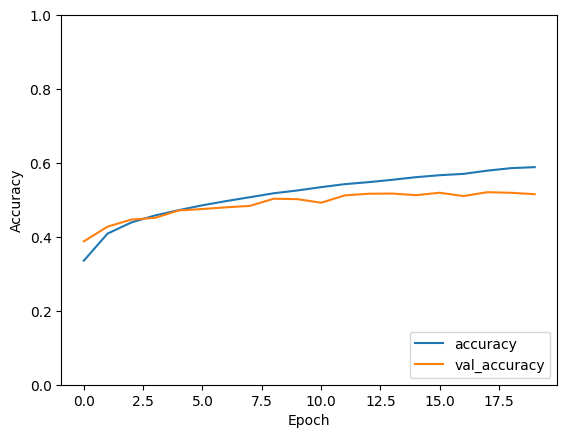

In [19]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [22]:
prediction=model.predict(X_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


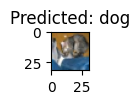

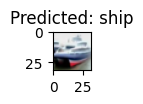

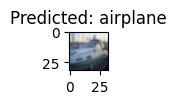

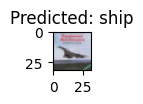

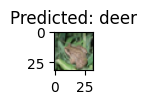

In [27]:
for i in range(5):
  plt.figure(figsize=(0.5, 0.5))
  plt.imshow(X_test[i])
  plt.title(f'Predicted: {cifar10_dataset_classes[prediction[i].argmax()]}')
  plt.show()
